In [ ]:
#. Bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# . Carregamento do dataset
dataset_tesouro = 'tesouro.csv'

df = pd.read_csv(
    dataset_tesouro,
    sep=';',
    encoding='latin1'
)

# . Foco no público feminino
df_fem = df[df['Genero'].str.strip() == 'F'].copy()

# . Selecionar colunas relevantes
df_fem = df_fem[['Idade', 'UF do Investidor', 'Situacao da Conta', 'Operou 12 Meses', 'Data de Adesao']]

# Remove apenas os nulos nessas colunas
df_fem = df_fem.dropna(subset=['Idade', 'UF do Investidor', 'Situacao da Conta', 'Operou 12 Meses', 'Data de Adesao'])





In [12]:
# 1. Manter somente idades plausíveis (15 a 100 anos)
df_fem = df_fem[df_fem['Idade'].between(15, 100)]

# 2. Codificar variáveis categóricas com os valores corretos do seu dataset
df_fem['Conta_Ativa'] = df_fem['Situacao da Conta'].map({'A': 1, 'D': 0})
df_fem['Operou'] = df_fem['Operou 12 Meses'].map({'S': 1, 'N': 0})

# 3. Criar DataFrame final para clusterização
df_cluster = df_fem[['Idade', 'Operou', 'Conta_Ativa']].copy()

# 4. Normalização
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)


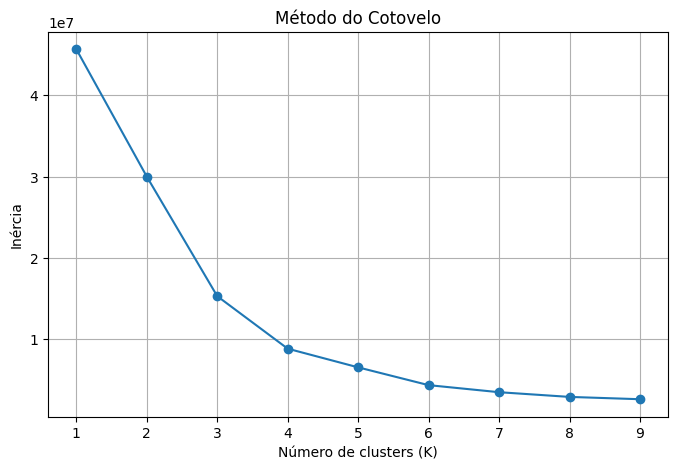

In [13]:
# 5. Método do Cotovelo para escolher o número de clusters ideal
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotando a curva do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()